# Linear Representations

In [1]:
# Uncomment below lines and run this cell to install neuronav and requirements for colab.

#!git clone https://github.com/awjuliani/neuro-nav
#!pip install ./neuro-nav[experiments_remote]

In [2]:
from neuronav.envs.grid_env import GridEnv, GridSize, GridObsType
from neuronav.agents.td_agents import TDSR, TDQ
from neuronav.agents.mb_agents import MBV
from neuronav.envs.grid_topographies import GridTopography
from neuronav.utils import run_episode
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

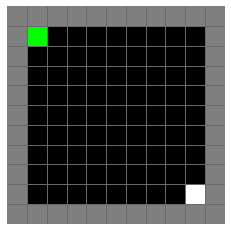

In [3]:
env = GridEnv(
    topography=GridTopography.empty, 
    grid_size=GridSize.small, 
    obs_type=GridObsType.twohot
)
obs = env.reset()
env.render()

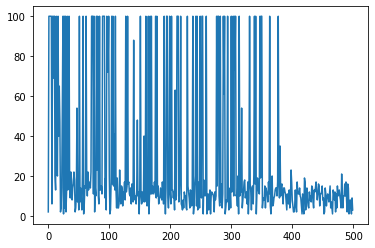

In [4]:
num_episodes = 500
num_steps = 100

agent = TDQ(
    env.observation_space.shape[0], 
    env.action_space.n, 
    lr=1e-2, 
    poltype="egreedy", 
    epsilon=0.1
)

all_steps = []

for _ in range(num_episodes):
    agent, steps = run_episode(env, agent, num_steps, random_start=True)
    all_steps.append(steps)

plt.plot(all_steps)

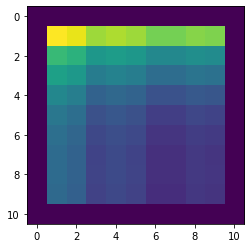

In [5]:
v_map = np.zeros([env.grid_size, env.grid_size])

obs = env.reset()
for i in range(2000):
    v = agent.q_estimate(obs).mean()
    v_map[env.agent_pos[0], env.agent_pos[1]] = v
    obs, _, _, _ = env.step(env.action_space.sample())

plt.imshow(v_map)